In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import PassiveAggressiveClassifier
import xgboost as xg
import seaborn as sns

# Read Data

In [2]:
df_sat = pd.read_csv('train.csv')
df_sat.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [3]:
#check distribution of target variable
df_sat['TARGET'].value_counts()

0    73012
1     3008
Name: TARGET, dtype: int64

In [4]:
#remove id
df=df_sat[list(df_sat)[1:]]
df.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [5]:
#check range  value distribution for 
def find_min_max_features(df, f):
    return df[f].min(), df[f].max()
train_zero = df[df['TARGET'] == 0]
train_one = df[df['TARGET'] == 1]
cols=['ind_var7_emit_ult1','ind_var7_recib_ult1','ind_var10_ult1','ind_var10cte_ult1','ind_var9_cte_ult1','ind_var9_ult1','ind_var43_emit_ult1'
 , 'ind_var43_recib_ult1']
one_range = dict()
for f in cols:
        mn0, mx0 = find_min_max_features(train_zero, f)
        mn1, mx1 = find_min_max_features(train_one, f)
        one_range[f] = (mn1, mx1)
        if mn0 != mn1 or mx0 != mx1:
            print("\nFeature {}".format(f))
            print("Range target=0  ({} - {})".format(mn0, mx0))
            print("Range target=1  ({} - {})".format(mn1, mx1))
            
            


Feature ind_var7_emit_ult1
Range target=0  (0 - 1)
Range target=1  (0 - 0)


In [6]:
#check correlation between imp_op variables

df[['imp_op_var39_comer_ult1','imp_op_var39_comer_ult3','imp_op_var40_comer_ult1','imp_op_var40_comer_ult3',
   'imp_op_var40_efect_ult1','imp_op_var40_efect_ult3','imp_op_var40_ult1','imp_op_var41_comer_ult1','imp_op_var41_comer_ult3',
   'imp_op_var41_efect_ult1','imp_op_var41_efect_ult3','imp_op_var41_ult1','imp_op_var39_efect_ult1','imp_op_var39_efect_ult3',
   'imp_op_var39_ult1']].corr()

,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1
imp_op_var39_comer_ult1,1.000000,0.886476,0.342709,0.295295,0.032280,0.054809,0.249247,0.961781,0.856878,0.289993,0.261390,0.647756,0.289901,0.262532,0.667389
imp_op_var39_comer_ult3,0.886476,1.000000,0.316671,0.355670,0.029094,0.055449,0.247707,0.848845,0.959840,0.267052,0.280200,0.565997,0.266931,0.281297,0.587151
imp_op_var40_comer_ult1,0.342709,0.316671,1.000000,0.852206,0.061187,0.106558,0.705267,0.072373,0.081950,0.089652,0.073140,0.097676,0.092551,0.076952,0.189878
imp_op_var40_comer_ult3,0.295295,0.355670,0.852206,1.000000,0.053579,0.110342,0.648953,0.065112,0.079183,0.065168,0.060999,0.071776,0.067795,0.065001,0.156998
imp_op_var40_efect_ult1,0.032280,0.029094,0.061187,0.053579,1.000000,0.887375,0.265720,0.016437,0.014948,0.088462,0.062037,0.077873,0.145026,0.095789,0.111745
imp_op_var40_efect_ult3,0.054809,0.055449,0.106558,0.110342,0.887375,1.000000,0.267603,0.027130,0.026020,0.095818,0.076602,0.090371,0.145895,0.114612,0.124230
imp_op_var40_ult1,0.249247,0.247707,0.705267,0.648953,0.265720,0.267603,1.000000,0.059053,0.069404,0.081886,0.068833,0.091457,0.096527,0.078828,0.223185
imp_op_var41_comer_ult1,0.961781,0.848845,0.072373,0.065112,0.016437,0.027130,0.059053,1.000000,0.885836,0.281746,0.256192,0.659234,0.280804,0.256293,0.653203
imp_op_var41_comer_ult3,0.856878,0.959840,0.081950,0.079183,0.014948,0.026020,0.069404,0.885836,1.000000,0.265277,0.280552,0.582149,0.264360,0.280520,0.579130
imp_op_var41_efect_ult1,0.289993,0.267052,0.089652,0.065168,0.088462,0.095818,0.081886,0.281746,0.265277,1.000000,0.810084,0.885353,0.998378,0.810787,0.877598


In [7]:
#find top correlated columns in imp_op 
corr=df[['imp_op_var39_comer_ult1','imp_op_var39_comer_ult3','imp_op_var40_comer_ult1','imp_op_var40_comer_ult3',
   'imp_op_var40_efect_ult1','imp_op_var40_efect_ult3','imp_op_var40_ult1','imp_op_var41_comer_ult1','imp_op_var41_comer_ult3',
   'imp_op_var41_efect_ult1','imp_op_var41_efect_ult3','imp_op_var41_ult1','imp_op_var39_efect_ult1','imp_op_var39_efect_ult3',
   'imp_op_var39_ult1']].corr()
stck = corr.unstack()
sorStckImpOp = stck.order(kind="quicksort")
sordictImpOp=sorStckImpOp.to_dict()

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: order is deprecated, use sort_values(...)


In [8]:
keyList=[]
for key in sordictImpOp:
    if key[0]==key[1]:
        keyList.append(key)
    if sordictImpOp[key]<.85:
        keyList.append(key)
for k in keyList:
    del sordictImpOp[k]
sordictImpOp
    

{('imp_op_var39_comer_ult1', 'imp_op_var39_comer_ult3'): 0.88647604920432277,
 ('imp_op_var39_comer_ult1', 'imp_op_var41_comer_ult1'): 0.96178095816084996,
 ('imp_op_var39_comer_ult1', 'imp_op_var41_comer_ult3'): 0.85687813259549517,
 ('imp_op_var39_comer_ult3', 'imp_op_var39_comer_ult1'): 0.88647604920432277,
 ('imp_op_var39_comer_ult3', 'imp_op_var41_comer_ult3'): 0.95983976382078051,
 ('imp_op_var39_efect_ult1', 'imp_op_var39_ult1'): 0.87812430933530394,
 ('imp_op_var39_efect_ult1', 'imp_op_var41_efect_ult1'): 0.99837813420256116,
 ('imp_op_var39_efect_ult1', 'imp_op_var41_ult1'): 0.88389161162473606,
 ('imp_op_var39_efect_ult3', 'imp_op_var41_efect_ult3'): 0.99927093425379487,
 ('imp_op_var39_ult1', 'imp_op_var39_efect_ult1'): 0.87812430933530394,
 ('imp_op_var39_ult1', 'imp_op_var41_efect_ult1'): 0.8775980665945079,
 ('imp_op_var39_ult1', 'imp_op_var41_ult1'): 0.99110268491950437,
 ('imp_op_var40_comer_ult1', 'imp_op_var40_comer_ult3'): 0.85220599826293353,
 ('imp_op_var40_comer_u

In [9]:
#find top correlated columns in ind_var
ind_var='ind_var1	ind_var2_0	ind_var2	ind_var5_0	ind_var5	ind_var6_0	ind_var6	ind_var8_0	ind_var8	ind_var12_0	ind_var12	ind_var13_0	ind_var13_corto_0	ind_var13_corto	ind_var13_largo_0	ind_var13_largo	ind_var13_medio_0	ind_var13_medio	ind_var13	ind_var14_0	ind_var14	ind_var17_0	ind_var17	ind_var18_0	ind_var18	ind_var19	ind_var20_0	ind_var20	ind_var24_0	ind_var24	ind_var25_cte	ind_var26_0	ind_var26_cte	ind_var26	ind_var25_0	ind_var25	ind_var27_0	ind_var28_0	ind_var28	ind_var27	ind_var29_0	ind_var29	ind_var30_0	ind_var30	ind_var31_0	ind_var31	ind_var32_cte	ind_var32_0	ind_var32	ind_var33_0	ind_var33	ind_var34_0	ind_var34	ind_var37_cte	ind_var37_0	ind_var37	ind_var39_0	ind_var40_0	ind_var40	ind_var41_0	ind_var41	ind_var39	ind_var44_0	ind_var44	ind_var46_0	ind_var46'
ind_var1='ind_var7_emit_ult1	ind_var7_recib_ult1	ind_var10_ult1	ind_var10cte_ult1	ind_var9_cte_ult1	ind_var9_ult1	ind_var43_emit_ult1	ind_var43_recib_ult1'
ind_var1=ind_var1.split()
ind_var=ind_var.split()
ind_var=ind_var+ind_var1
corr=df[ind_var].corr().abs()
stck = corr.unstack()
sorStckIndVar = stck.order(kind="quicksort")
sorStckIndVar=sorStckIndVar.fillna(0)
sordictIndVar=sorStckIndVar.to_dict()
keyList=[]
for key in sordictIndVar:
#     if key[0]==key[1]:
#         keyList.append(key)
    if sordictIndVar[key]<.90:
        keyList.append(key)
for k in keyList:
    del sordictIndVar[k]
keyList=[]
for key in sordictIndVar:
     if key[0]==key[1]:
         keyList.append(key)
for k in keyList:
    del sordictIndVar[k]
sordictIndVar

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:9: FutureWarning: order is deprecated, use sort_values(...)


{('ind_var1', 'ind_var39'): 0.99472171698762635,
 ('ind_var1', 'ind_var40'): 0.99472171698762635,
 ('ind_var10_ult1', 'ind_var10cte_ult1'): 0.93099827305920979,
 ('ind_var10_ult1', 'ind_var9_cte_ult1'): 0.9057278058750452,
 ('ind_var10_ult1', 'ind_var9_ult1'): 0.96757253272500787,
 ('ind_var10cte_ult1', 'ind_var10_ult1'): 0.93099827305920979,
 ('ind_var10cte_ult1', 'ind_var9_cte_ult1'): 0.97285659069972974,
 ('ind_var10cte_ult1', 'ind_var9_ult1'): 0.90410222619922309,
 ('ind_var12', 'ind_var24'): 0.90926925438713346,
 ('ind_var13', 'ind_var13_0'): 0.98584142608295267,
 ('ind_var13_0', 'ind_var13'): 0.98584142608295267,
 ('ind_var13_0', 'ind_var13_corto_0'): 0.90208406826112297,
 ('ind_var13_corto', 'ind_var13_corto_0'): 0.98210036551070745,
 ('ind_var13_corto_0', 'ind_var13_0'): 0.90208406826112297,
 ('ind_var13_corto_0', 'ind_var13_corto'): 0.98210036551070745,
 ('ind_var13_largo', 'ind_var13_largo_0'): 0.99146990708978977,
 ('ind_var13_largo_0', 'ind_var13_largo'): 0.9914699070897897

In [10]:
#find top correlated columns in num_var
num_var='num_var1_0	num_var1	num_var4	num_var5_0	num_var5	num_var6_0	num_var6	num_var8_0	num_var8	num_var12_0	num_var12	num_var13_0	num_var13_corto_0	num_var13_corto	num_var13_largo_0	num_var13_largo	num_var13_medio_0	num_var13_medio	num_var13	num_var14_0	num_var14	num_var17_0	num_var17	num_var18_0	num_var18	num_var20_0	num_var20	num_var24_0	num_var24	num_var26_0	num_var26	num_var25_0	num_var25	num_var22_hace2	num_var22_hace3	num_var22_ult1	num_var22_ult3	num_var7_emit_ult1	num_var7_recib_ult1'
num_var1='num_var27_0	num_var28_0	num_var28	num_var27	num_var29_0	num_var29	num_var30_0	num_var30	num_var31_0	num_var31	num_var32_0	num_var32	num_var33_0	num_var33	num_var34_0	num_var34	num_var35	num_var37_med_ult2	num_var37_0	num_var37	num_var39_0	num_var40_0	num_var40	num_var41_0	num_var41	num_var39	num_var42_0	num_var42	num_var44_0	num_var44	num_var46_0	num_var46	num_var45_hace2	num_var45_hace3	num_var45_ult1	num_var45_ult3	num_var43_emit_ult1	num_var43_recib_ult1	num_var2_0_ult1	num_var2_ult1'
num_var1=num_var1.split()
num_var=num_var.split()
num_var=num_var+num_var1
corr=df[num_var].corr().abs()
stck = corr.unstack()
sorStckNumVar = stck.order(kind="quicksort")
sorStckNumVar=sorStckNumVar.fillna(0)
sordictNumVar=sorStckNumVar.to_dict()
keyList=[]
for key in sordictNumVar:
#     if key[0]==key[1]:
#         keyList.append(key)
    if sordictNumVar[key]<.90:
        keyList.append(key)
for k in keyList:
    del sordictNumVar[k]
keyList=[]
for key in sordictNumVar:
     if key[0]==key[1]:
         keyList.append(key)
for k in keyList:
    del sordictNumVar[k]
sordictNumVar

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:9: FutureWarning: order is deprecated, use sort_values(...)


{('num_var1', 'num_var39'): 0.99303563275029871,
 ('num_var1', 'num_var40'): 0.99303563275029871,
 ('num_var12', 'num_var24'): 0.90399713132985615,
 ('num_var12_0', 'num_var42_0'): 0.90808575859731699,
 ('num_var13', 'num_var13_0'): 0.97791663735402534,
 ('num_var13_0', 'num_var13'): 0.97791663735402534,
 ('num_var13_corto', 'num_var13_corto_0'): 0.9767847037384455,
 ('num_var13_corto_0', 'num_var13_corto'): 0.9767847037384455,
 ('num_var13_largo', 'num_var13_largo_0'): 0.97917307453621505,
 ('num_var13_largo_0', 'num_var13_largo'): 0.97917307453621505,
 ('num_var13_medio', 'num_var13_medio_0'): 1.0,
 ('num_var13_medio_0', 'num_var13_medio'): 1.0,
 ('num_var17_0', 'num_var31_0'): 0.91165772789744814,
 ('num_var18', 'num_var18_0'): 1.0,
 ('num_var18_0', 'num_var18'): 1.0,
 ('num_var1_0', 'num_var40_0'): 0.9976911934178514,
 ('num_var24', 'num_var12'): 0.90399713132985615,
 ('num_var24', 'num_var24_0'): 0.94198005355125369,
 ('num_var24_0', 'num_var24'): 0.94198005355125369,
 ('num_var25

In [11]:
#find top correlated columns in saldo_var
saldo_var='saldo_var1	saldo_var5	saldo_var6	saldo_var8	saldo_var12	saldo_var13_corto	saldo_var13_largo	saldo_var13_medio	saldo_var13	saldo_var14	saldo_var17	saldo_var18	saldo_var20	saldo_var24	saldo_var26	saldo_var25	saldo_var28	saldo_var27	saldo_var29	saldo_var30	saldo_var31	saldo_var32	saldo_var33	saldo_var34	saldo_var37	saldo_var40	saldo_var41	saldo_var42	saldo_var44	saldo_var46	saldo_var2_ult1'
saldo_var=saldo_var.split()
corr=df[saldo_var].corr().abs()
stck = corr.unstack()
sorStcksaldoVar = stck.order(kind="quicksort")
sorStcksaldoVar=sorStcksaldoVar.fillna(0)
sordictsaldoVar=sorStcksaldoVar.to_dict()
keyList=[]
for key in sordictsaldoVar:
#     if key[0]==key[1]:
#         keyList.append(key)
    if sordictsaldoVar[key]<.85:
        keyList.append(key)
for k in keyList:
    del sordictsaldoVar[k]
keyList=[]
for key in sordictsaldoVar:
     if key[0]==key[1]:
         keyList.append(key)
for k in keyList:
    del sordictsaldoVar[k]
sordictsaldoVar

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: order is deprecated, use sort_values(...)


{('saldo_var1', 'saldo_var18'): 0.99986210623005789,
 ('saldo_var12', 'saldo_var24'): 0.99693239733780992,
 ('saldo_var12', 'saldo_var42'): 0.97841470770370287,
 ('saldo_var13', 'saldo_var13_corto'): 0.853542179679605,
 ('saldo_var13_corto', 'saldo_var13'): 0.853542179679605,
 ('saldo_var17', 'saldo_var31'): 0.97401783093736904,
 ('saldo_var18', 'saldo_var1'): 0.99986210623005789,
 ('saldo_var24', 'saldo_var12'): 0.99693239733780992,
 ('saldo_var24', 'saldo_var42'): 0.97526728426594123,
 ('saldo_var25', 'saldo_var26'): 0.98523275339969574,
 ('saldo_var26', 'saldo_var25'): 0.98523275339969574,
 ('saldo_var29', 'saldo_var6'): 1.0,
 ('saldo_var31', 'saldo_var17'): 0.97401783093736904,
 ('saldo_var42', 'saldo_var12'): 0.97841470770370287,
 ('saldo_var42', 'saldo_var24'): 0.97526728426594123,
 ('saldo_var6', 'saldo_var29'): 1.0}

In [12]:
#find top correlated columns in saldoMedio_var
saldoMedio_var='saldo_medio_var5_hace2	saldo_medio_var5_hace3	saldo_medio_var5_ult1	saldo_medio_var5_ult3	saldo_medio_var8_hace2	saldo_medio_var8_hace3	saldo_medio_var8_ult1	saldo_medio_var8_ult3	saldo_medio_var12_hace2	saldo_medio_var12_hace3	saldo_medio_var12_ult1	saldo_medio_var12_ult3	saldo_medio_var13_corto_hace2	saldo_medio_var13_corto_hace3	saldo_medio_var13_corto_ult1	saldo_medio_var13_corto_ult3	saldo_medio_var13_largo_hace2	saldo_medio_var13_largo_hace3	saldo_medio_var13_largo_ult1	saldo_medio_var13_largo_ult3	saldo_medio_var13_medio_hace2	saldo_medio_var13_medio_hace3	saldo_medio_var13_medio_ult1	saldo_medio_var13_medio_ult3	saldo_medio_var17_hace2	saldo_medio_var17_hace3	saldo_medio_var17_ult1	saldo_medio_var17_ult3	saldo_medio_var29_hace2	saldo_medio_var29_hace3	saldo_medio_var29_ult1	saldo_medio_var29_ult3	saldo_medio_var33_hace2	saldo_medio_var33_hace3	saldo_medio_var33_ult1	saldo_medio_var33_ult3	saldo_medio_var44_hace2	saldo_medio_var44_hace3	saldo_medio_var44_ult1	saldo_medio_var44_ult3'
saldoMedio_var=saldoMedio_var.split()
corr=df[saldoMedio_var].corr().abs()
stck = corr.unstack()
sorStcksaldoMedioVar = stck.order(kind="quicksort")
sorStcksaldoMedioVar=sorStcksaldoMedioVar.fillna(0)
sordictsaldoMedioVar=sorStcksaldoMedioVar.to_dict()
keyList=[]
for key in sordictsaldoMedioVar:
#     if key[0]==key[1]:
#         keyList.append(key)
    if sordictsaldoMedioVar[key]<.90:
        keyList.append(key)
for k in keyList:
    del sordictsaldoMedioVar[k]
keyList=[]
for key in sordictsaldoMedioVar:
     if key[0]==key[1]:
         keyList.append(key)
for k in keyList:
    del sordictsaldoMedioVar[k]
sordictsaldoMedioVar

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: order is deprecated, use sort_values(...)


{('saldo_medio_var12_hace2', 'saldo_medio_var12_ult1'): 0.91687161352854329,
 ('saldo_medio_var12_hace2', 'saldo_medio_var12_ult3'): 0.92133979382133369,
 ('saldo_medio_var12_ult1', 'saldo_medio_var12_hace2'): 0.91687161352854329,
 ('saldo_medio_var12_ult1', 'saldo_medio_var12_ult3'): 0.98593972437009625,
 ('saldo_medio_var12_ult3', 'saldo_medio_var12_hace2'): 0.92133979382133369,
 ('saldo_medio_var12_ult3', 'saldo_medio_var12_ult1'): 0.98593972437009625,
 ('saldo_medio_var13_corto_hace2',
  'saldo_medio_var13_corto_ult1'): 0.91928005265595125,
 ('saldo_medio_var13_corto_hace2',
  'saldo_medio_var13_corto_ult3'): 0.92097730592864957,
 ('saldo_medio_var13_corto_ult1',
  'saldo_medio_var13_corto_hace2'): 0.91928005265595125,
 ('saldo_medio_var13_corto_ult1',
  'saldo_medio_var13_corto_ult3'): 0.98837294585259139,
 ('saldo_medio_var13_corto_ult3',
  'saldo_medio_var13_corto_hace2'): 0.92097730592864957,
 ('saldo_medio_var13_corto_ult3',
  'saldo_medio_var13_corto_ult1'): 0.988372945852591

In [13]:
#find top correlated columns in numop_var
numop_var='num_op_var40_hace2	num_op_var40_hace3	num_op_var40_ult1	num_op_var40_ult3	num_op_var41_hace2	num_op_var41_hace3	num_op_var41_ult1	num_op_var41_ult3	num_op_var39_hace2	num_op_var39_hace3	num_op_var39_ult1	num_op_var39_ult3	num_op_var39_comer_ult1	num_op_var39_comer_ult3	num_op_var40_comer_ult1	num_op_var40_comer_ult3	num_op_var40_efect_ult1	num_op_var40_efect_ult3	num_op_var41_comer_ult1	num_op_var41_comer_ult3	num_op_var41_efect_ult1	num_op_var41_efect_ult3	num_op_var39_efect_ult1	num_op_var39_efect_ult3'
numop_var=numop_var.split()
corr=df[numop_var].corr().abs()
stck = corr.unstack()
sorStcknumopVar = stck.order(kind="quicksort")
sorStcknumopVar=sorStcknumopVar.fillna(0)
sordictnumopVar=sorStcknumopVar.to_dict()
keyList=[]
for key in sordictnumopVar:
#     if key[0]==key[1]:
#         keyList.append(key)
    if sordictnumopVar[key]<.90:
        keyList.append(key)
for k in keyList:
    del sordictnumopVar[k]
keyList=[]
for key in sordictnumopVar:
     if key[0]==key[1]:
         keyList.append(key)
for k in keyList:
    del sordictnumopVar[k]
sordictnumopVar

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: order is deprecated, use sort_values(...)


{('num_op_var39_comer_ult1', 'num_op_var39_comer_ult3'): 0.91770481404022253,
 ('num_op_var39_comer_ult1', 'num_op_var39_ult1'): 0.93171928408913285,
 ('num_op_var39_comer_ult1', 'num_op_var41_comer_ult1'): 0.97351979318363457,
 ('num_op_var39_comer_ult1', 'num_op_var41_ult1'): 0.91541860539503117,
 ('num_op_var39_comer_ult3', 'num_op_var39_comer_ult1'): 0.91770481404022253,
 ('num_op_var39_comer_ult3', 'num_op_var41_comer_ult3'): 0.95785932424028952,
 ('num_op_var39_efect_ult1', 'num_op_var39_efect_ult3'): 0.90325257422234917,
 ('num_op_var39_efect_ult1', 'num_op_var41_efect_ult1'): 0.99896594905026781,
 ('num_op_var39_efect_ult1', 'num_op_var41_efect_ult3'): 0.90215597642704703,
 ('num_op_var39_efect_ult3', 'num_op_var39_efect_ult1'): 0.90325257422234917,
 ('num_op_var39_efect_ult3', 'num_op_var41_efect_ult1'): 0.90283923173432923,
 ('num_op_var39_efect_ult3', 'num_op_var41_efect_ult3'): 0.99924441663805708,
 ('num_op_var39_hace2', 'num_op_var41_hace2'): 0.99259644746960463,
 ('num_o

In [14]:
#find top correlated columns in deltaimp_var
deltaimp_var='delta_imp_amort_var18_1y3	delta_imp_amort_var34_1y3	delta_imp_aport_var13_1y3	delta_imp_aport_var17_1y3	delta_imp_aport_var33_1y3	delta_imp_compra_var44_1y3	delta_imp_reemb_var13_1y3	delta_imp_reemb_var17_1y3	delta_imp_reemb_var33_1y3	delta_imp_trasp_var17_in_1y3	delta_imp_trasp_var17_out_1y3	delta_imp_trasp_var33_in_1y3	delta_imp_trasp_var33_out_1y3	delta_imp_venta_var44_1y3'
deltaimp_var=deltaimp_var.split()
corr=df[deltaimp_var].corr().abs()
stck = corr.unstack()
sorStckdeltaimpVar = stck.order(kind="quicksort")
sorStckdeltaimpVar=sorStckdeltaimpVar.fillna(0)
sordictdeltaimpVar=sorStckdeltaimpVar.to_dict()
keyList=[]
for key in sordictdeltaimpVar:
#     if key[0]==key[1]:
#         keyList.append(key)
    if sordictdeltaimpVar[key]<.70:
        keyList.append(key)
for k in keyList:
    del sordictdeltaimpVar[k]
keyList=[]
for key in sordictdeltaimpVar:
     if key[0]==key[1]:
         keyList.append(key)
for k in keyList:
    del sordictdeltaimpVar[k]
sordictdeltaimpVar

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: order is deprecated, use sort_values(...)


{}

In [15]:
#find top correlated columns in deltanum_var
deltanum_var='delta_num_aport_var13_1y3	delta_num_aport_var17_1y3	delta_num_aport_var33_1y3	delta_num_compra_var44_1y3	delta_num_reemb_var13_1y3	delta_num_reemb_var17_1y3	delta_num_reemb_var33_1y3	delta_num_trasp_var17_in_1y3	delta_num_trasp_var17_out_1y3	delta_num_trasp_var33_in_1y3	delta_num_trasp_var33_out_1y3	delta_num_venta_var44_1y3'
deltanum_var=deltanum_var.split()
corr=df[deltanum_var].corr().abs()
stck = corr.unstack()
sorStckdeltanumVar = stck.order(kind="quicksort")
sorStckdeltanumVar=sorStckdeltanumVar.fillna(0)
sordictdeltanumVar=sorStckdeltanumVar.to_dict()
keyList=[]
for key in sordictdeltanumVar:
#     if key[0]==key[1]:
#         keyList.append(key)
    if sordictdeltanumVar[key]<.70:
        keyList.append(key)
for k in keyList:
    del sordictdeltanumVar[k]
keyList=[]
for key in sordictdeltanumVar:
     if key[0]==key[1]:
         keyList.append(key)
for k in keyList:
    del sordictdeltanumVar[k]
sordictdeltanumVar

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: order is deprecated, use sort_values(...)


{}

In [16]:
#find top correlated columns in numMesses_var
numMesses_var='num_meses_var5_ult3	num_meses_var8_ult3	num_meses_var12_ult3	num_meses_var13_corto_ult3	num_meses_var13_largo_ult3	num_meses_var13_medio_ult3	num_meses_var17_ult3	num_meses_var29_ult3	num_meses_var33_ult3	num_meses_var39_vig_ult3	num_meses_var44_ult3'
numMesses_var=numMesses_var.split()
corr=df[numMesses_var].corr().abs()
stck = corr.unstack()
sorStcknumMessesVar = stck.order(kind="quicksort")
sorStcknumMessesVar=sorStcknumMessesVar.fillna(0)
sordictnumMessesVar=sorStcknumMessesVar.to_dict()
keyList=[]
for key in sordictnumMessesVar:
#     if key[0]==key[1]:
#         keyList.append(key)
    if sordictnumMessesVar[key]<.70:
        keyList.append(key)
for k in keyList:
    del sordictnumMessesVar[k]
keyList=[]
for key in sordictnumMessesVar:
     if key[0]==key[1]:
         keyList.append(key)
for k in keyList:
    del sordictnumMessesVar[k]
sordictnumMessesVar

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: order is deprecated, use sort_values(...)


{}

In [17]:
#find list to keep and list to remove
keepList=[]
removeList=[]
#get all dicts in one place
fulldict={}
fulldict.update(sordictImpOp)
fulldict.update(sordictIndVar)
fulldict.update(sordictNumVar)
fulldict.update(sordictsaldoVar)
fulldict.update(sordictsaldoMedioVar)
fulldict.update(sordictnumopVar)
for key in fulldict:
    if key[0] not in keepList:
        if key[0] not in removeList:
            keepList.append(key[0])
            if key[1] not in keepList and key[1] not in removeList:
                removeList.append(key[1])
        elif key[1] not in keepList and key[1] not in removeList:
            removeList.append(key[1])
    elif key[1] not in keepList and key[1] not in removeList:
        print 'key0:',key[0]
        print 'key1:',key[1]
        removeList.append(key[1])
#print sordictsaldoVar
print keepList
print removeList

key0: num_op_var41_ult3
key1: num_op_var39_ult3
key0: ind_var26_0
key1: ind_var26_cte
key0: ind_var26_0
key1: ind_var25_0
key0: num_op_var41_ult3
key1: num_op_var41_comer_ult3
key0: num_var39
key1: num_var40
key0: saldo_medio_var13_largo_ult1
key1: saldo_medio_var13_largo_ult3
key0: num_op_var41_efect_ult3
key1: num_op_var41_efect_ult1
key0: ind_var40
key1: ind_var1
key0: num_op_var41_ult1
key1: num_op_var39_ult1
key0: num_var24
key1: num_var24_0
['saldo_var12', 'saldo_medio_var12_hace2', 'num_op_var41_ult1', 'saldo_var13_corto', 'num_var39', 'ind_var37', 'ind_var32', 'num_op_var41_ult3', 'ind_var26_0', 'saldo_medio_var13_largo_ult1', 'ind_var12', 'num_op_var39_comer_ult3', 'num_op_var40_comer_ult3', 'ind_var13_medio', 'saldo_var26', 'saldo_var29', 'ind_var24_0', 'saldo_medio_var17_hace2', 'saldo_medio_var13_corto_hace2', 'ind_var13_corto_0', 'saldo_medio_var44_ult3', 'ind_var10_ult1', 'num_op_var41_efect_ult3', 'ind_var32_cte', 'num_var6', 'ind_var18', 'saldo_medio_var33_ult1', 'imp_o

In [18]:
#check common elements in keeplist and removelist
common = filter(lambda x:x in keepList,removeList)
common

[]

In [19]:
#remove all the columns in removelist from df
df_sub=df.drop(removeList,axis=1)
df_sub=df_sub[list(df_sub)[:-1]]
df_sub.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult3,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_ult1,...,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult3,var38
0,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000
1,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000
3,2,37,0.0,195.0,0.0,0.0,0.0,0.0,195.0,195.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000
4,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016


In [24]:
#remove more columns
corr=df_sub[list(df_sub)].corr().abs()
stck = corr.unstack()
sorStck = stck.order(kind="quicksort")
sorStck=sorStck.fillna(0)
sordict=sorStck.to_dict()
keyList=[]
for key in sordict:
#     if key[0]==key[1]:
#         keyList.append(key)
    if sordict[key]<.90:
        keyList.append(key)
for k in keyList:
    del sordict[k]
keyList=[]
for key in sordict:
     if key[0]==key[1]:
         keyList.append(key)
for k in keyList:
    del sordict[k]
sordict

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: order is deprecated, use sort_values(...)


{('delta_imp_amort_var18_1y3', 'ind_var18'): 0.99999999999982103,
 ('delta_imp_amort_var18_1y3', 'num_var18'): 1.0000000000002285,
 ('delta_imp_amort_var34_1y3', 'ind_var34_0'): 0.99999999999932876,
 ('delta_imp_amort_var34_1y3', 'num_var34'): 1.0000000000000444,
 ('delta_imp_amort_var34_1y3', 'saldo_var34'): 0.92467633506805791,
 ('delta_imp_aport_var13_1y3',
  'delta_num_aport_var13_1y3'): 1.0000000000000118,
 ('delta_imp_aport_var17_1y3', 'delta_num_aport_var17_1y3'): 1.0,
 ('delta_imp_aport_var33_1y3', 'delta_num_aport_var33_1y3'): 1.0,
 ('delta_imp_compra_var44_1y3',
  'delta_num_compra_var44_1y3'): 0.99999999999999867,
 ('delta_imp_reemb_var13_1y3', 'delta_num_reemb_var13_1y3'): 1.0,
 ('delta_imp_reemb_var13_1y3', 'num_reemb_var13_ult1'): 1.0000000000005629,
 ('delta_imp_reemb_var17_1y3', 'delta_num_reemb_var17_1y3'): 1.0,
 ('delta_imp_reemb_var33_1y3', 'delta_num_reemb_var33_1y3'): 1.0,
 ('delta_imp_reemb_var33_1y3', 'imp_reemb_var33_ult1'): 0.99999999999777378,
 ('delta_imp_ree

In [25]:
#make final keep list and removelist
keepListFinal=[]
removeListFinal=[]
for key in sordict:
    if key[0] not in keepListFinal:
        if key[0] not in removeListFinal:
            keepListFinal.append(key[0])
            if key[1] not in keepListFinal and key[1] not in removeListFinal:
                removeListFinal.append(key[1])
        elif key[1] not in keepListFinal and key[1] not in removeListFinal:
            removeListFinal.append(key[1])
    elif key[1] not in keepListFinal and key[1] not in removeListFinal:
        print 'key0:',key[0]
        print 'key1:',key[1]
        removeListFinal.append(key[1])
#print sordictsaldoVar
print keepListFinal
print removeListFinal
#check common elements in keeplist and removelist
common = filter(lambda x:x in keepListFinal,removeListFinal)
common

key0: num_trasp_var33_in_ult1
key1: delta_imp_trasp_var33_in_1y3
key0: ind_var18
key1: num_var18
key0: saldo_var17
key1: saldo_medio_var17_hace2
key0: num_var13_corto_0
key1: ind_var13_corto_0
key0: num_meses_var8_ult3
key1: ind_var8
key0: saldo_medio_var13_corto_ult1
key1: saldo_medio_var13_corto_hace2
key0: saldo_var34
key1: imp_amort_var34_ult1
key0: delta_imp_reemb_var33_1y3
key1: imp_reemb_var33_ult1
key0: num_op_var41_ult1
key1: num_op_var41_ult3
['num_meses_var8_ult3', 'delta_imp_reemb_var33_1y3', 'imp_trasp_var33_in_hace3', 'delta_imp_aport_var17_1y3', 'imp_compra_var44_ult1', 'saldo_var8', 'num_var34', 'delta_imp_trasp_var17_in_1y3', 'saldo_medio_var13_corto_ult1', 'num_trasp_var33_in_ult1', 'saldo_medio_var13_medio_hace2', 'num_meses_var12_ult3', 'ind_var1_0', 'num_med_var45_ult3', 'num_reemb_var13_ult1', 'delta_imp_trasp_var33_out_1y3', 'delta_num_trasp_var33_out_1y3', 'ind_var13_medio', 'ind_var18', 'saldo_var1', 'ind_var20', 'num_var5', 'num_var6', 'ind_var13_largo', 'num_

[]

In [26]:
df_subSub=df_sub.drop(removeListFinal,axis=1)
df_subSub.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult3,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_sal_var16_ult1,...,saldo_medio_var13_medio_ult1,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var44_hace2,saldo_medio_var44_hace3,var38
0,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000
1,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000
3,2,37,0.0,195.0,0.0,0.0,0.0,0.0,195.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000
4,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016


In [27]:
corr=df_subSub[list(df_subSub)].corr().abs()
stck = corr.unstack()
sorStck = stck.order(kind="quicksort")
sorStck=sorStck.fillna(0)
sordict=sorStck.to_dict()
keyList=[]
for key in sordict:
#     if key[0]==key[1]:
#         keyList.append(key)
    if sordict[key]<.90:
        keyList.append(key)
for k in keyList:
    del sordict[k]
keyList=[]
for key in sordict:
     if key[0]==key[1]:
         keyList.append(key)
for k in keyList:
    del sordict[k]
sordict

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: order is deprecated, use sort_values(...)
  app.launch_new_instance()


{('delta_imp_reemb_var13_1y3', 'num_reemb_var13_ult1'): 1.0000000000005629,
 ('delta_imp_trasp_var17_in_1y3', 'delta_num_trasp_var17_in_1y3'): 1.0,
 ('delta_imp_trasp_var17_out_1y3', 'delta_num_trasp_var17_out_1y3'): 1.0,
 ('delta_imp_trasp_var33_out_1y3', 'delta_num_trasp_var33_out_1y3'): 1.0,
 ('delta_imp_trasp_var33_out_1y3',
  'imp_trasp_var33_out_ult1'): 0.99999999999637545,
 ('delta_num_trasp_var17_in_1y3', 'delta_imp_trasp_var17_in_1y3'): 1.0,
 ('delta_num_trasp_var17_out_1y3', 'delta_imp_trasp_var17_out_1y3'): 1.0,
 ('delta_num_trasp_var33_out_1y3', 'delta_imp_trasp_var33_out_1y3'): 1.0,
 ('delta_num_trasp_var33_out_1y3',
  'imp_trasp_var33_out_ult1'): 0.99999999999637545,
 ('imp_aport_var17_hace3', 'saldo_var17'): 0.98191022712994913,
 ('imp_trasp_var33_out_ult1',
  'delta_imp_trasp_var33_out_1y3'): 0.99999999999637545,
 ('imp_trasp_var33_out_ult1',
  'delta_num_trasp_var33_out_1y3'): 0.99999999999637545,
 ('ind_var13_medio', 'saldo_medio_var13_medio_hace2'): 0.987170405368996

In [28]:
#make final keep list and removelist
keepListFinal=[]
removeListFinal=[]
for key in sordict:
    if key[0] not in keepListFinal:
        if key[0] not in removeListFinal:
            keepListFinal.append(key[0])
            if key[1] not in keepListFinal and key[1] not in removeListFinal:
                removeListFinal.append(key[1])
        elif key[1] not in keepListFinal and key[1] not in removeListFinal:
            removeListFinal.append(key[1])
    elif key[1] not in keepListFinal and key[1] not in removeListFinal:
        removeListFinal.append(key[1])
#print sordictsaldoVar
print keepListFinal
print removeListFinal
#check common elements in keeplist and removelist
common = filter(lambda x:x in keepListFinal,removeListFinal)
common

['saldo_medio_var13_medio_hace2', 'ind_var5', 'delta_num_trasp_var33_out_1y3', 'delta_num_trasp_var17_out_1y3', 'saldo_medio_var13_medio_ult1', 'ind_var24_0', 'imp_aport_var17_hace3', 'delta_imp_reemb_var13_1y3', 'saldo_var34', 'saldo_medio_var29_ult3', 'ind_var32_cte', 'num_meses_var44_ult3', 'delta_imp_trasp_var17_in_1y3']
['ind_var13_medio', 'num_var5', 'delta_imp_trasp_var33_out_1y3', 'delta_imp_trasp_var17_out_1y3', 'num_var24', 'imp_trasp_var33_out_ult1', 'saldo_var17', 'num_reemb_var13_ult1', 'num_var34', 'saldo_var29', 'num_var6', 'ind_var32', 'ind_var44_0', 'delta_num_trasp_var17_in_1y3']


[]

In [29]:
df_subSub=df_subSub.drop(removeListFinal,axis=1)
corr=df_subSub[list(df_subSub)].corr().abs()
stck = corr.unstack()
sorStck = stck.order(kind="quicksort")
sorStck=sorStck.fillna(0)
sordict=sorStck.to_dict()
keyList=[]
for key in sordict:
#     if key[0]==key[1]:
#         keyList.append(key)
    if sordict[key]<.90:
        keyList.append(key)
for k in keyList:
    del sordict[k]
keyList=[]
for key in sordict:
     if key[0]==key[1]:
         keyList.append(key)
for k in keyList:
    del sordict[k]
sordict

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: order is deprecated, use sort_values(...)


{('saldo_medio_var13_medio_hace2',
  'saldo_medio_var13_medio_ult1'): 0.94487285490954509,
 ('saldo_medio_var13_medio_ult1',
  'saldo_medio_var13_medio_hace2'): 0.94487285490954509}

In [30]:
df_subSub=df_subSub.drop('saldo_medio_var13_medio_ult1',axis=1)
df_subSub.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult3,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_sal_var16_ult1,...,saldo_medio_var13_medio_hace3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var44_hace2,saldo_medio_var44_hace3,var38
0,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000
1,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000
3,2,37,0.0,195.0,0.0,0.0,0.0,0.0,195.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000
4,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016


In [32]:
#save reduced set as csv
#df_subSub['TARGET']=df_sat.TARGET
df_subSub.to_csv('sat_sub.csv',index=False)

In [132]:
#use relieff to restrict features to 99
from ReliefF import ReliefF
from sklearn.datasets import load_digits
from sklearn.cross_validation import train_test_split
digits = load_digits(2)
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)
x_df=df_subSub
y_df=df_sat['TARGET']
rel = ReliefF(n_neighbors=100, n_features_to_keep=99)
rel.fit(x_df,y_df)
features=rel.top_features
features

# X_train=pd.DataFrame(X_train)
# print X_train.shape
# y_train=pd.DataFrame(y_train)
# print y_train.shape
# fs = ReliefF(n_neighbors=50, n_features_to_keep=5)
# fs.fit_transform(X_train, y_train)
# fs.top_features

KeyError: 0

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

x_df=df_subSub
y_df=df_sat['TARGET']
knn = KNeighborsClassifier(n_neighbors=8)
sfbs = SFS(knn, 
           k_features=60, 
           forward=False, 
           floating=True, 
           scoring='accuracy',
           cv=4,
           n_jobs=-1)
sfbs.fit(x_df, y_df)

ImportError: No module named model_selection

In [70]:
#run xgboost on dataset
from xgboost import plot_importance
model = xg.XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=4,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
xgfull = xg.DMatrix(df_subSub, label=df_sat.TARGET)
xgb_param = model.get_xgb_params()
model=xg.train(xgb_param, xgfull,1000)


In [72]:
features=pd.Series(model.get_fscore()).sort_values(ascending=False)
features_sub=features.index.values.tolist()[:40]

In [38]:
#randomize data
df_subSub['TARGET']=df_sat.TARGET
df_subSub=df_subSub.sample(frac=1).reset_index(drop=True)
#get train, test
train=df_subSub[:50000]
test=df_subSub[50001:]


In [56]:
train.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult3,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_sal_var16_ult1,...,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var44_hace2,saldo_medio_var44_hace3,var38,TARGET
0,2,24,0.0,2.67,0.0,0.0,0.0,0.0,2.67,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,111235.53,0
1,2,23,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,86872.62,0
2,2,22,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,108877.11,0
3,2,62,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,109595.55,0
4,2,23,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90287.46,0


In [57]:
#run xgboost on reduced dataset
from xgboost import plot_importance
model = xg.XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=4,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
xgtrain = xg.DMatrix(train[list(train)[:-1]], label=train.TARGET)
xgb_param = model.get_xgb_params()
model=xg.train(xgb_param, xgtrain,1000)



In [58]:
xgtest = xg.DMatrix(test[list(test)[:-1]])
y_pred=model.predict(xgtest)
y_test=test.TARGET

In [59]:
ypred=pd.Series(y_pred)
ypred=ypred.apply(lambda x:1 if x>.5 else 0)
ypred.head()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [60]:
ypred.value_counts()

0    26018
1        1
dtype: int64

In [67]:
def show_confusion_matrix(C,class_labels=['0','1']):
    """
    C: ndarray, shape (2,2) as given by scikit-learn confusion_matrix function
    class_labels: list of strings, default simply labels 0 and 1.

    Draws confusion matrix with associated metrics.
    """
    import matplotlib.pyplot as plt
    import numpy as np
    
    assert C.shape == (2,2), "Confusion matrix should be from binary classification only."
    
    # true negative, false positive, etc...
    tn = C[0,0]; fp = C[0,1]; fn = C[1,0]; tp = C[1,1];

    NP = fn+tp # Num positive examples
    NN = tn+fp # Num negative examples
    N  = NP+NN

    fig = plt.figure(figsize=(8,8))
    ax  = fig.add_subplot(111)
    ax.imshow(C, interpolation='nearest', cmap=plt.cm.gray)

    # Draw the grid boxes
    ax.set_xlim(-0.5,2.5)
    ax.set_ylim(2.5,-0.5)
    ax.plot([-0.5,2.5],[0.5,0.5], '-k', lw=2)
    ax.plot([-0.5,2.5],[1.5,1.5], '-k', lw=2)
    ax.plot([0.5,0.5],[-0.5,2.5], '-k', lw=2)
    ax.plot([1.5,1.5],[-0.5,2.5], '-k', lw=2)

    # Set xlabels
    ax.set_xlabel('Predicted Label', fontsize=16)
    ax.set_xticks([0,1,2])
    ax.set_xticklabels(class_labels + [''])
    ax.xaxis.set_label_position('top')
    ax.xaxis.tick_top()
    # These coordinate might require some tinkering. Ditto for y, below.
    ax.xaxis.set_label_coords(0.34,1.06)

    # Set ylabels
    ax.set_ylabel('True Label', fontsize=16, rotation=90)
    ax.set_yticklabels(class_labels + [''],rotation=90)
    ax.set_yticks([0,1,2])
    ax.yaxis.set_label_coords(-0.09,0.65)


    # Fill in initial metrics: tp, tn, etc...
    ax.text(0,0,
            'True Neg: %d\n(Num Neg: %d)'%(tn,NN),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(0,1,
            'False Neg: %d'%fn,
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(1,0,
            'False Pos: %d'%fp,
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))


    ax.text(1,1,
            'True Pos: %d\n(Num Pos: %d)'%(tp,NP),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    # Fill in secondary metrics: accuracy, true pos rate, etc...
    ax.text(2,0,
            'False Pos Rate: %.2f'%(fp / (fp+tn+0.)),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(2,1,
            'True Pos Rate: %.2f'%(tp / (tp+fn+0.)),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(2,2,
            'Accuracy: %.2f'%((tp+tn+0.)/N),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(0,2,
            'Neg Pre Val: %.2f'%(1-fn/(fn+tn+0.)),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(1,2,
            'Pos Pred Val: %.2f'%(tp/(tp+fp+0.)),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))


    plt.tight_layout()
    plt.show()

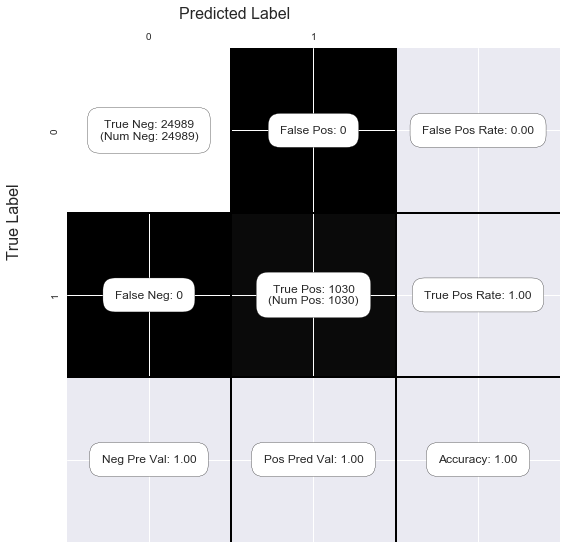

In [43]:
from sklearn.metrics import confusion_matrix
C = confusion_matrix(y_test,ypred)
show_confusion_matrix(C, [0, 1])

In [85]:
#use over sampling smote method to increase the records for minority class
from imblearn.over_sampling import SMOTE
x_train=train[list(train)[:-1]]
y_train=train.TARGET
sm = SMOTE(kind='regular')
x_over, y_over = sm.fit_sample(x_train, y_train)
y_over=pd.Series(y_over)
x_over=pd.DataFrame(x_over)
x_over.columns=list(x_train)
#check member type counts in new dataset
print y_over.value_counts()


1    48022
0    48022
dtype: int64


In [74]:
x_over.head()

,var38,saldo_medio_var5_hace3,var15,saldo_medio_var5_ult3,saldo_var30,saldo_medio_var5_hace2,saldo_var5,saldo_medio_var5_ult1,imp_trans_var37_ult1,imp_op_var41_ult1,...,saldo_medio_var8_hace2,saldo_medio_var12_hace3,saldo_var26,var3,imp_aport_var13_hace3,num_var43_recib_ult1,num_var22_ult1,num_op_var39_efect_ult3,saldo_var8,num_var4
0,111235.53,0.00,24.0,1.89,3.33,0.18,3.33,3.57,0.0,2.67,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0
1,86872.62,2.79,23.0,2.94,3.00,3.00,3.00,3.00,0.0,0.00,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
2,108877.11,11.61,22.0,63.87,90.00,90.00,90.00,90.00,0.0,0.00,...,0.0,0.0,0.0,2.0,0.0,0.0,3.0,0.0,0.0,1.0
3,109595.55,0.00,62.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
4,90287.46,0.00,23.0,2.82,3.00,2.61,3.00,3.00,0.0,0.00,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0


In [75]:
#run xgboost on smote
from xgboost import plot_importance
model_smote = xg.XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=4,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
xgtrain = xg.DMatrix(x_over, label=y_over)
xgb_param = model_smote.get_xgb_params()
model_smote=xg.train(xgb_param, xgtrain,1000)



In [76]:
#run smote model on test
xgtest = xg.DMatrix(test[list(test)[:-1]][features_sub])
y_pred=model_smote.predict(xgtest)
y_test=test.TARGET
ypred=pd.Series(y_pred)
ypred=ypred.apply(lambda x:1 if x>.5 else 0)
ypred.value_counts()

0    26000
1       19
dtype: int64

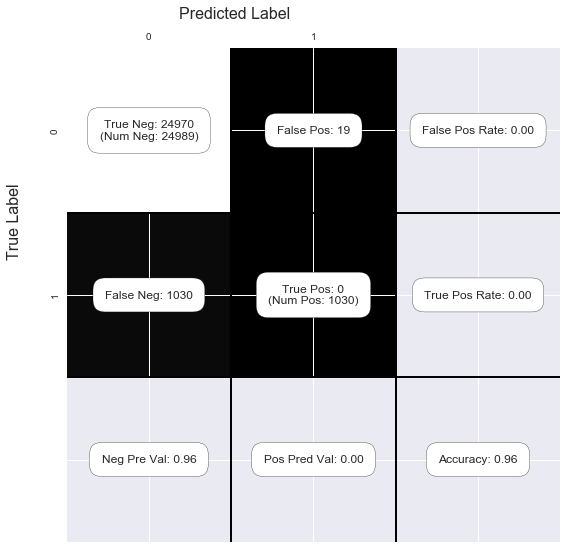

In [77]:
from sklearn.metrics import confusion_matrix
C = confusion_matrix(y_test,ypred)
show_confusion_matrix(C, [0, 1])

In [82]:
#passive aggresive classification
x_train=train[list(train)[:-1]]
x_test=test[list(test)[:-1]]              
y_train=train.TARGET
y_test=test.TARGET
paagr =PassiveAggressiveClassifier(n_iter=50)
paagr.fit(x_train,y_train)
y_pred=paagr.predict(x_test)


array([0, 0, 0, 0], dtype=int64)

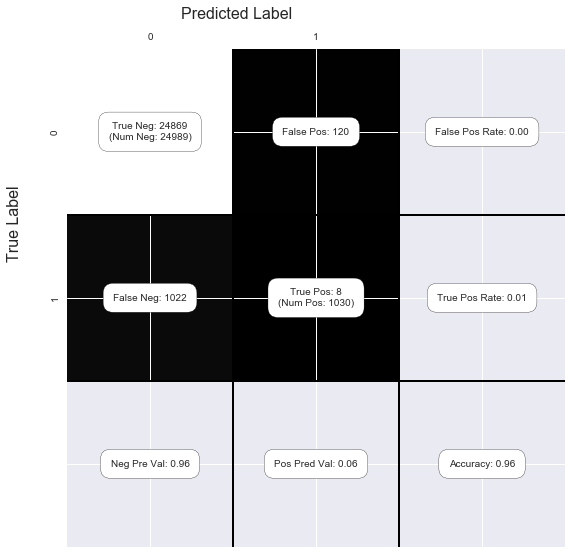

In [84]:
#check accuracy for passive regression
C = confusion_matrix(y_test,y_pred)
show_confusion_matrix(C, [0, 1])

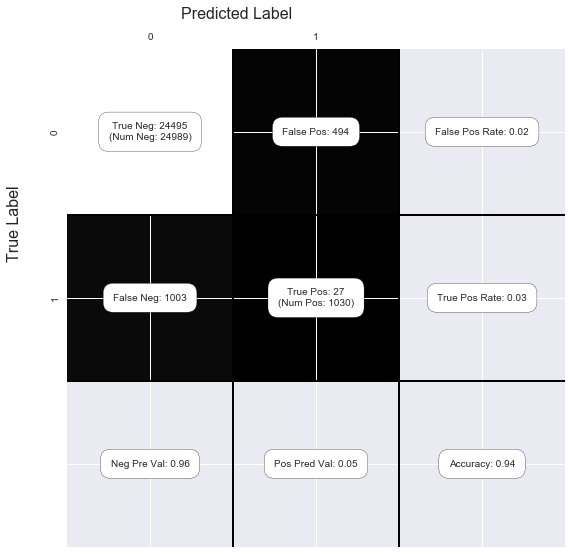

In [86]:
#passive aggresive classification on smote
x_test=test[list(test)[:-1]]              
y_test=test.TARGET
paagr =PassiveAggressiveClassifier(n_iter=1000)
paagr.fit(x_over,y_over)
y_pred=paagr.predict(x_test)
C = confusion_matrix(y_test,y_pred)
show_confusion_matrix(C, [0, 1])

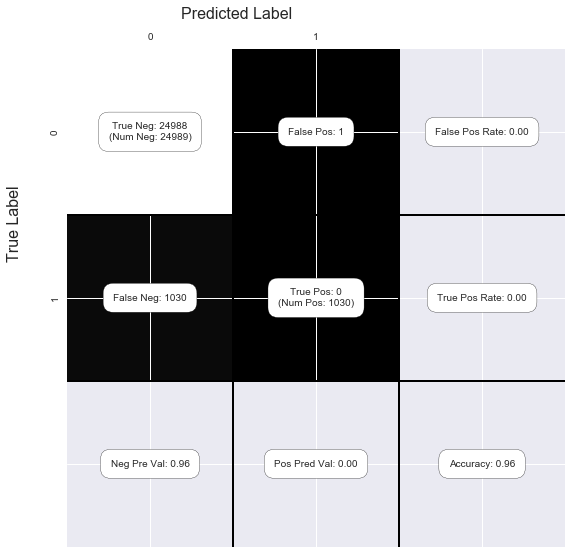

In [90]:
#test perceptron on smote
from sklearn.linear_model import Perceptron
x_train=train[list(train)[:-1]]
x_test=test[list(test)[:-1]]              
y_train=train.TARGET
y_test=test.TARGET
ptron= Perceptron(n_iter=5000)
ptron.fit(x_train, y_train)
y_pred=ptron.predict(x_test)
C = confusion_matrix(y_test,y_pred)
show_confusion_matrix(C, [0, 1])

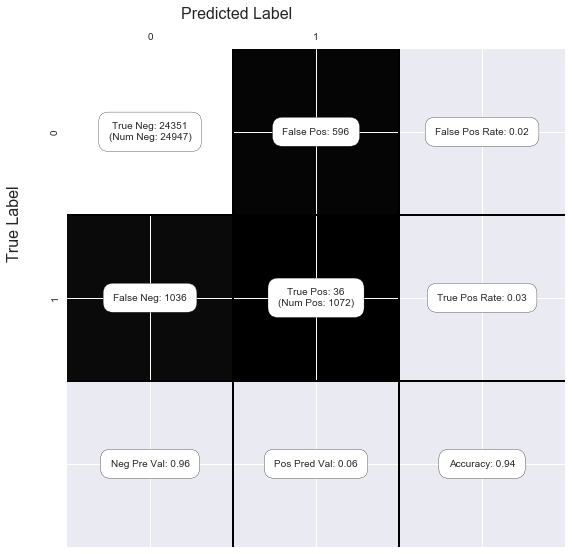

In [100]:
#run passive aggressive classifier on smaller set of larget class
df_subSub['TARGET']=df_sat.TARGET
df=df_sat.sample(frac=1).reset_index(drop=True)
#get train, test
train=df[:50000]
test=df[50001:]
pos=train[train.TARGET==0][:2060]
neg=train[train.TARGET==1]
x_pos=pos[list(train)[:-1]]
x_neg=neg[list(train)[:-1]]
x_test=test[list(test)[:-1]] 
x_tot= pd.concat([x_pos,x_neg],axis=0)
y_tot=pd.concat([pos.TARGET,neg.TARGET],axis=0)
paagr =PassiveAggressiveClassifier(n_iter=100)
paagr.fit(x_tot,y_tot)
y_pred=paagr.predict(x_test)
C = confusion_matrix(y_test,y_pred)
show_confusion_matrix(C, [0, 1])


In [156]:
#Read from csv
df=pd.read_csv('sat_sub.csv')
df=df.sample(frac=1).reset_index(drop=True)
train=df[list(df)[:-4]][:50000]
test=df[list(df)[:-4]][50001:]
cost_mat_train=df[list(df)[-4:]][:50000]
cost_mat_test=df[list(df)[-4:]][50001:]
cost_mat_train.head()

,FP,FN,TP,TN
0,4000,30000,0,0
1,4000,30000,0,0
2,4000,30000,0,0
3,4000,30000,0,0
4,4000,30000,0,0


(50000, 199)
(50000L,)


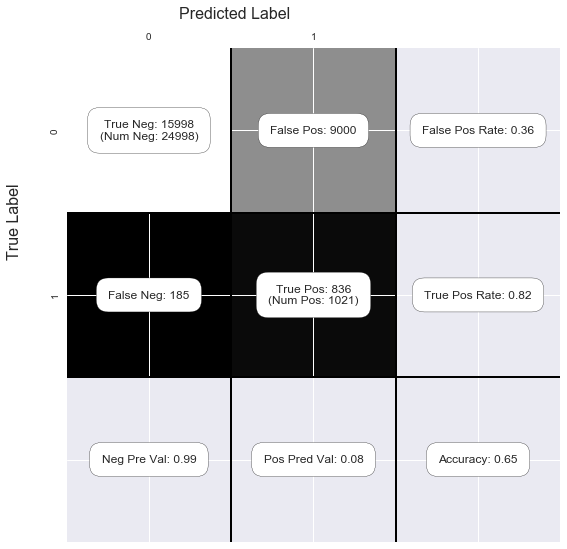

In [157]:
#cost sensitive classifier
from costcla.models import CostSensitiveRandomPatchesClassifier
#get train, test
x_train=train[list(train)[:-1]]
print x_train.shape
y_train=train.TARGET
print y_train.shape
x_test=test[list(test)[:-1]]
y_test=test.TARGET
csrp=CostSensitiveRandomPatchesClassifier(combination='weighted_voting')
csrp.fit(x_train.values, y_train.values,cost_mat_train.values)
y_pred=csrp.predict(x_test.values)
C = confusion_matrix(y_test,y_pred)
show_confusion_matrix(C, [0, 1])


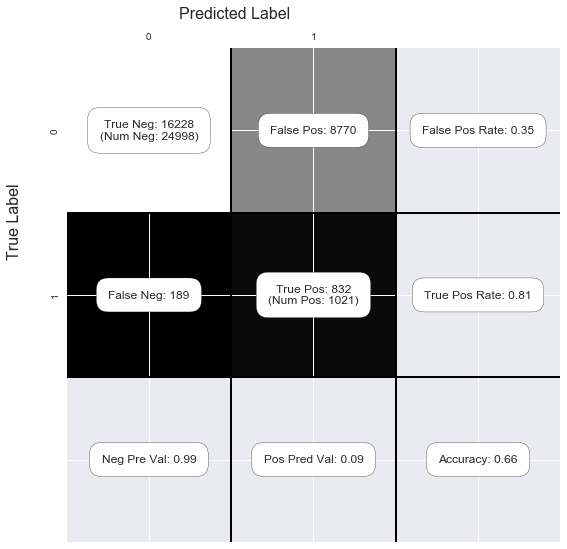

In [158]:
from costcla.models import CostSensitiveDecisionTreeClassifier
cdtc=CostSensitiveDecisionTreeClassifier()
cdtc.fit(x_train.values, y_train.values,cost_mat_train.values)
y_pred=cdtc.predict(x_test.values)
C = confusion_matrix(y_test,y_pred)
show_confusion_matrix(C, [0, 1])

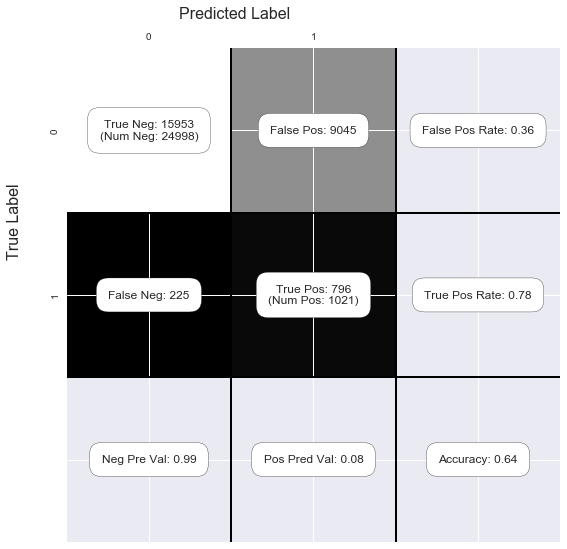

In [159]:
from costcla.models import CostSensitiveRandomForestClassifier
csrfc=CostSensitiveRandomForestClassifier(combination='weighted_voting')
csrfc.fit(x_train.values, y_train.values,cost_mat_train.values)
y_pred=csrfc.predict(x_test.values)
C = confusion_matrix(y_test,y_pred)
show_confusion_matrix(C, [0, 1])

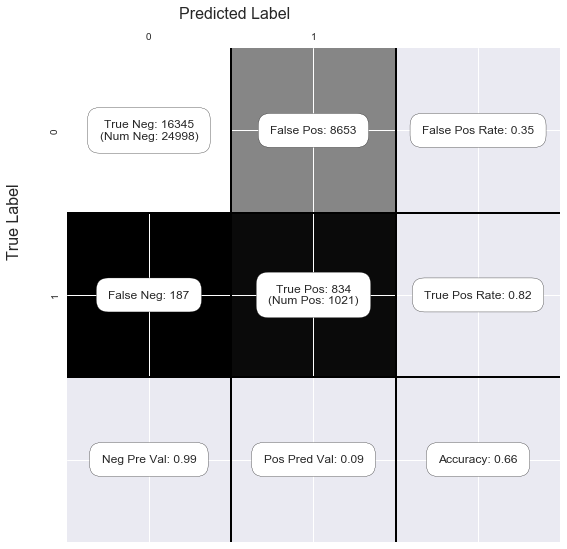

In [160]:
from costcla.models import CostSensitiveBaggingClassifier
csbc=CostSensitiveBaggingClassifier(combination='weighted_voting')
csbc.fit(x_train.values, y_train.values,cost_mat_train.values)
y_pred=csbc.predict(x_test.values)
C = confusion_matrix(y_test,y_pred)
show_confusion_matrix(C, [0, 1])

In [114]:
ColumnsFinal=list(train)
ColumnsFinal.remove('TARGET')
#ColumnsFinal.append('ID')

In [115]:
#read test file
test_df=pd.read_csv('test.csv')
Test=test_df[ColumnsFinal]
Test.head()


,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult3,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_sal_var16_ult1,...,saldo_medio_var13_medio_hace3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var44_hace2,saldo_medio_var44_hace3,var38
0,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10
1,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72
2,2,23,0.0,0.0,0.0,0.0,0.0,60.0,60.0,0.0,...,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95
3,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,187898.61
4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,73649.73


In [147]:
#run cost sensitive model on test file
y_pred_test=cdtc.predict(Test.values)
test_df['TARGET']=pd.DataFrame(y_pred_test)

In [148]:
#get upload file
uploaddf=test_df[['ID','TARGET']]
uploaddf.to_csv('upload2.csv',index=False)